##  <u> Project description/introduction text (the background information) </u>



NASA reads and identifies a lot of stars in the universe but identifying stars manually is slower than with machines.This type of problem is important to solve since it would increase the amount of stars we can identify in a short amount of time.
This project predicts what type of star the read information best matches.Stars fall into these categories based on how hot and big they are: Red dwarf, Brown Dwarf, White Dwarf, Main Sequence, Super Giants, and  Hyper Giants. They are placed in one of these categories based on their temperature, luminosity, radius, absolute magnitude, color and spectral class.






##  <u> Machine learning algorithm selected for this project </u>

Name and add short description of the algorithm used for this project. You can re-use this text in your final poster submission.

Logistic Regression:

A regression analysis can be used for classification by converting the prediction to a probability or odds of the observation belonging to a certain class.

Logistic regression models output the probability of an event/class based on the values of the input independent variables. It performs classification based on the estimated probability that an observation is of a given class 

K-Nearest Neighbors:

Is a ML classification method for classifying observations into classes/labels. Its an instance-based learning type of algorithm.

Support Vector Machines(SVM):

SVM are used for supervised ML problems. They can be used for both classification and regression problems but most often used for classification. SVM is a binary classifier. 

These algorithms above all do well in classification problems.

Cross-Validation
Sometimes the project does not have enough data for both training and validation datasets. Cross-validation is an approach to resolve the lack of data Procedure: Break training data into X parts/slices/folds. For each fold, train the model on all the data except that fold and use that fold for validation dataset. Average performance across X models


##  <u> Dataset source </u>

List the source from where the dataset for this project was obtained.
https://www.kaggle.com/brsdincer/star-type-classification/version/1

##  <u> References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [655]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC

In [656]:
np.random.seed(42)

#### Code the solution

In [657]:
df = pd.read_csv('Stars.csv')
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


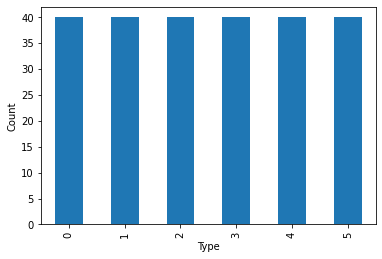

In [658]:
target = 'Type'
df.groupby(target)['L'].count().plot.bar()

plt.ylabel('Count')
plt.show()

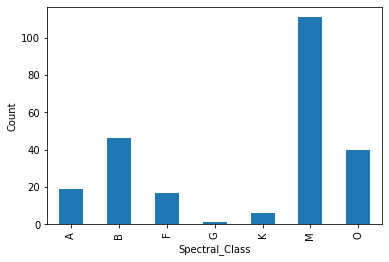

In [659]:
df.groupby('Spectral_Class')['L'].count().plot.bar()

plt.ylabel('Count')
plt.show()

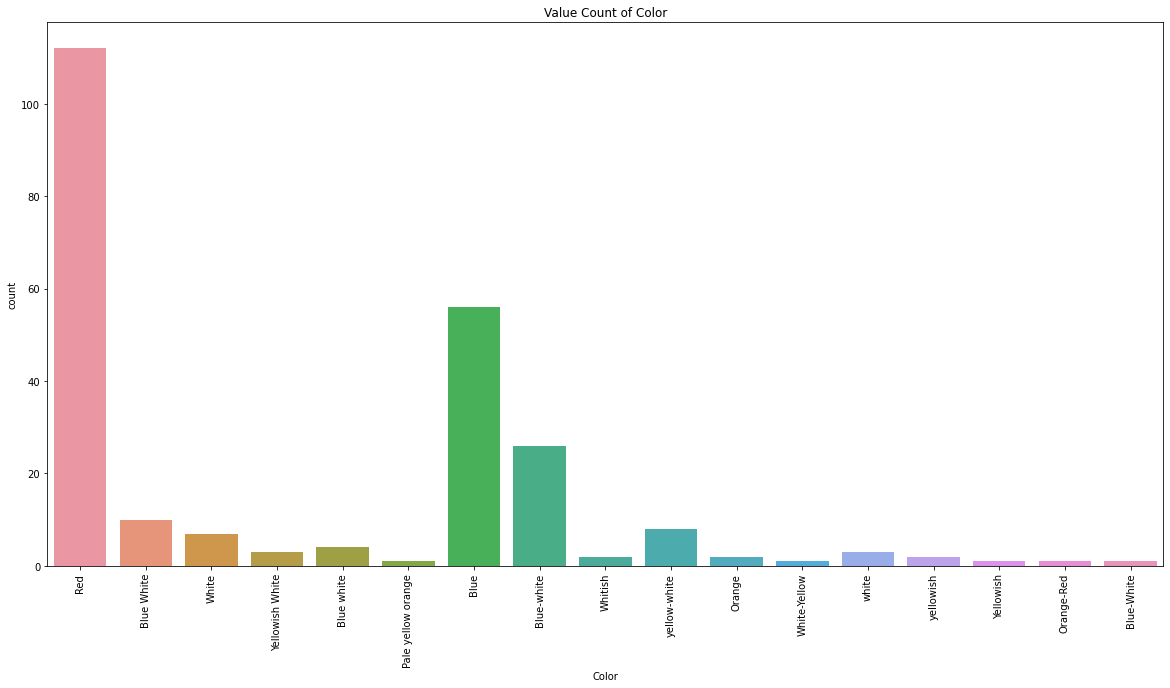

In [660]:
plt.figure(figsize=(20,10))
plt.title('Value Count of Color')
plt.xticks(rotation=90)
sns.countplot(data=df, x='Color');

In [661]:
X = df.drop('Type', axis = 1)
X = pd.get_dummies(X, drop_first = True)
Y = df['Type']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

scaler = scaler = MinMaxScaler()
scaler.fit(x_train)

x_trainScaled = scaler.transform(x_train)
x_testScaled = scaler.transform(x_test)

x_train.shape, x_test.shape


((192, 26), (48, 26))

# <b>Logistic regression</b>

              precision    recall  f1-score   support

           0       0.54      1.00      0.70         7
           1       1.00      0.33      0.50         9
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         6

    accuracy                           0.88        48
   macro avg       0.92      0.89      0.87        48
weighted avg       0.93      0.88      0.86        48

0.875


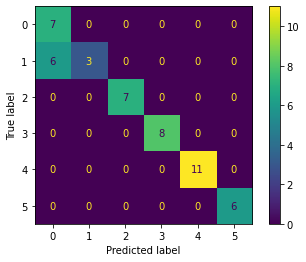

In [662]:
scores = {}

model = LogisticRegression()

model.fit(x_trainScaled, y_train)

y_pred = model.predict(x_testScaled)

print(classification_report(y_test, y_pred))

scores['Logistic Regression'] = model.score(x_testScaled, y_test)

print(model.score(x_testScaled, y_test))

plot_confusion_matrix(model,X_test,y_test)

# <b>KNN</b>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7
           3       0.89      1.00      0.94         8
           4       1.00      0.91      0.95        11
           5       1.00      1.00      1.00         6

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



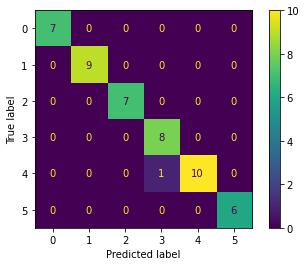

In [663]:
storeScore = []
n_neighbors = [3, 4, 5, 6, 7, 8, 9, 10]

for i in n_neighbors:
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_trainScaled, y_train)
    storeScore.append(model.score(x_testScaled, y_test))
    
accurateNeighbors = n_neighbors[storeScore.index(max(storeScore))]

model = KNeighborsClassifier(n_neighbors = accurateNeighbors)

model.fit(x_trainScaled, y_train)

y_pred = model.predict(x_testScaled)

print(classification_report(y_test, y_pred))

scores['KNN'] = model.score(x_testScaled, y_test)

plot_confusion_matrix(model,X_test,y_test)

# <b>SVM</b>

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.89      0.94         9
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         6

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



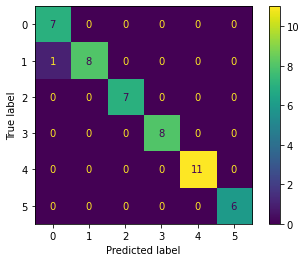

In [664]:
model = SVC(kernel = 'poly')

model.fit(x_trainScaled, y_train)

y_pred = model.predict(x_testScaled)

print(classification_report(y_test, y_pred,zero_division=1))

scores['SVM'] = model.score(x_testScaled,y_test)

plot_confusion_matrix(model,X_test,y_test)

In [665]:
print("Logistic Regression:",str(scores['Logistic Regression'] * 100) + "%", "accuracy")
print("KNN:",str(round(scores['KNN'] * 100,2)) + "%", " accuracy")
print("SVM:",str(round(scores['SVM'] * 100,2)) + "%", "accuracy")

Logistic Regression: 87.5% accuracy
KNN: 97.92%  accuracy
SVM: 97.92% accuracy


# <b>Cross Validation<b>

In [666]:
temp = StandardScaler().fit_transform(X)
xScaled = pd.DataFrame(data=temp, index=X.index, columns=X.columns)


pca = PCA(n_components=2)
pca.fit(xScaled)

PcaX = pca.transform(xScaled)
PcaDf = pd.DataFrame(data = PcaX,columns = ["1st PC", "2nd PC"])

PcaDf['Class'] = Y

PcaDf.head()

skf = StratifiedKFold(n_splits=5)

skf.get_n_splits(xScaled, Y)

model = LinearSVC()

scores = cross_val_score(model, xScaled, Y, scoring='accuracy', cv=skf, n_jobs=-1)

print("Individual cross-validation accuracies:")
for i, x in enumerate(scores):
    print(i + 1, ": ", x)

Individual cross-validation accuracies:
1 :  0.9375
2 :  0.8541666666666666
3 :  0.9583333333333334
4 :  1.0
5 :  0.9791666666666666
